### 1. Loading Required Packages

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

### 2. Data Import and Preparation

In [53]:
# Importing datasets
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")
submission = pd.read_csv("../sample_submission.csv")

# Splitting the dataset into train and test

X = train["Comment"]
y = train["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 2)


### 3. Final Submission Model - Logistic Regression
Key Features:
* Trained on 95% data
* C = 0.03
* Customized token_pattern in CountVectorizer

#### 3.1 Data Preprocessing and Feature Engineering with *CountVectorizer()*

In [54]:
# Preprocessing with CountVectorizer

## Building a custom token_pattern based on EDA results for enhancing the model performance
custom_token = r'(?u)\b\w\w+\b|\!|\?|\"|\'|\{|\}|\=|\<|\>|\#|\[|\]|\~|\:|\,|\_|\:|\*|\+|\-|\/|\@|\||\<=|\=>|\$|\&|\&&|\^|\!|\(|\)|\%'

cnt_vec = CountVectorizer(token_pattern =  custom_token, 
                          ngram_range = (1,3), 
                          binary = True, 
                          max_features = 100000000, 
                          analyzer = "word")

X_train = cnt_vec.fit_transform(X_train)
X_test = cnt_vec.transform(X_test)

# Actual test data
test_data_x = test["Comment"]
test_data_x = cnt_vec.transform(test_data_x)

#### 3.2 Model Building and Validation

In [55]:
# Logistic Regression

logitreg = LogisticRegression(penalty='l2', C = 0.03, solver='lbfgs', max_iter = 300, random_state = 10)
logitreg.fit(X_train, y_train)
y_pred = logitreg.predict(X_test)
print("Accuracy of Logistic Regression model =", accuracy_score(y_pred, y_test))

Accuracy of Logistic Regression model = 0.7452488687782806


Classification report
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       945
           1       0.77      0.79      0.78      1265

    accuracy                           0.75      2210
   macro avg       0.74      0.74      0.74      2210
weighted avg       0.74      0.75      0.74      2210



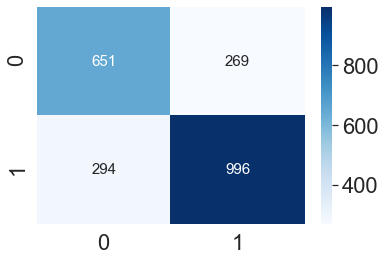

In [56]:
# Classification report
print("Classification report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(logitreg.predict(X_test),y_test)
cm_df = pd.DataFrame(C, range(2),range(2))
sns.set(font_scale=2)
plot = sns.heatmap(cm_df, annot = True, annot_kws={"size":15}, cmap = "Blues",  fmt='g')

#### 3.3 Creating Submission File
Final submission file : submission11_95pc_traindata.csv

In [57]:
predictions = logitreg.predict(test_data_x)

submission["Outcome"] = predictions

sub_file = pd.DataFrame({"Id" : submission['Id'], "Outcome": submission["Outcome"]})
sub_file.to_csv("submission11_95pc_traindata.csv", index = False)

### 4. Kaggle Score
* Rank: 14
* Public Score: 0.74420
* Private Score: 0.74118